In [6]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [3]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,reward_schedule=(2,-1,-0.01))
alpha = 0.8   # Learning rate
gamma = 0.95   # Discount factor

epsilon = 1.0          # Start with 100% exploration
max_epsilon = 1.0
min_epsilon = 0.01     # Minimum exploration probability
decay_rate = 0.005     # Linear Decay rate

total_episodes = 2000
episode_no = 0

Q = np.full([16,4],0.0)


# Use existing env, state, info, run variables
for episode in range(total_episodes):
    episode_no += 1
    state,info = env.reset()
    run = True

    epsilon = max(min_epsilon, max_epsilon*(decay_rate)**(episode_no))
    while run:
    
    #choosing action based on epsilon greedy method
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else :
                action = np.argmax(Q[state,:])

    #taking the action and observing new_state and reward
            next_state, reward, terminated, truncated, info = env.step(action)
            
            
    #updating Q table after every action according to TDL algorithm
            Q[state,action] = Q[state,action] + alpha*(reward + gamma * np.max(Q[next_state, :]) - Q[state,action])
     
     #updating the state
            state = next_state
        
    #checking if the action resulted in termination or truncation
            if terminated or truncated:
                run = False
            
env.close()
print("Training Completed.")
print(Q)

np.save("q_table.npy", Q)

Training Completed.
[[ 1.41720141  1.50231806  1.41060356  1.41673684]
 [-0.03690651 -0.8         1.58049811 -0.03692546]
 [-0.02894797  1.6856375  -0.02566472 -0.03013069]
 [-0.0240215  -0.8        -0.0230528  -0.0230528 ]
 [ 1.49986614  1.59191375 -0.9999872   1.41488082]
 [ 0.          0.          0.          0.        ]
 [-0.8         1.78549982 -0.8        -0.02413363]
 [ 0.          0.          0.          0.        ]
 [ 1.57899402 -0.9999872   1.686225    1.5018291 ]
 [ 1.59139755  1.60870154  1.7855     -0.99968   ]
 [ 1.67260003  1.89       -0.992       1.67899875]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.8        -0.01568     1.88978125 -0.01408   ]
 [ 1.75868314  1.874816    2.          1.78549909]
 [ 0.          0.          0.          0.        ]]


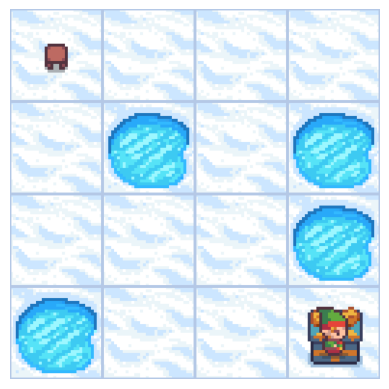

Run Finished.
Reward Structure : 2 for reaching goal, -1 for falling in hole, -0.01 for every step taken to reduce number of steps
Total Rewards is : 1


In [ ]:
#Training completed, Perfomance starting
print("\n--- Starting Performance Run ---")

total_reward = 0

#Initialize the environment in human render mode
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")

state, info= env.reset()
run = True

while run:
    #rendering the frame
    frame = env.render()
    
    # Visualisation Logic for Jupyter
    plt.imshow(frame)
    plt.axis('off') # Hide X/Y axis
    plt.show()
    
    # Small pause so we can see the movement 
    time.sleep(0.1)
    
    # Clear the previous plot to create animation effect
    clear_output(wait=True)
#Choosing the action on the basis of Q table(Exploitation)
    action = np.argmax(Q[state, :]) 
    
#Taking the action and observing reward
    next_state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
#Updating the state
    state = next_state
    
#checking if the action resulted in termination or truncation
    if terminated or truncated:
         run = False

plt.imshow(env.render())
plt.axis('off')
plt.show()

print("Run Finished.")
print("Reward Structure : 2 for reaching goal, -1 for falling in hole, -0.01 for every step taken to reduce number of steps")
print(f"Total Rewards is : {total_reward}",)
env.close()
